In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import sweetviz as sv
import seaborn as sns

C:\Users\Matheus\AppData\Local\Temp\ipykernel_11452\1406441595.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv("dados.csv")

#Profiling
profile = ProfileReport(df, title="Report")
display(profile)

#Sweetviz
analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=True)

display(df)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated.


,comércio,alimento,data da doação,data de validade,quantidade,valor calórico,tipo de alimento,dias restantes
0,Walmart,Arroz,2022-01-05,2024-01-05,10,640,Não perecível,730
1,Carrefour,Feijão,2022-02-15,2023-12-31,8,1400,Não perecível,684
2,Fogo de Chão,Frango Assado,2022-03-10,2022-03-14,1,1200,Perecível,4
3,Dia,Leite em Pó,2022-04-20,2024-06-30,5,2000,Não perecível,800
4,Mocotó,Salada Mista,2022-05-08,2022-05-12,2,500,Perecível,4
5,Walmart,Macarrão,2022-06-15,2023-12-31,6,1800,Não perecível,565
6,Carrefour,Óleo de Soja,2022-07-20,2024-12-31,3,900,Não perecível,894
7,D.O.M.,Bife à Parmegiana,2022-08-10,2022-08-15,1,1800,Perecível,5
8,Dia,Café em Pó,2022-09-05,2023-06-30,4,3000,Não perecível,298
9,Maní,Pizza Margherita,2022-10-15,2022-10-18,1,2000,Perecível,3


<AxesSubplot:>

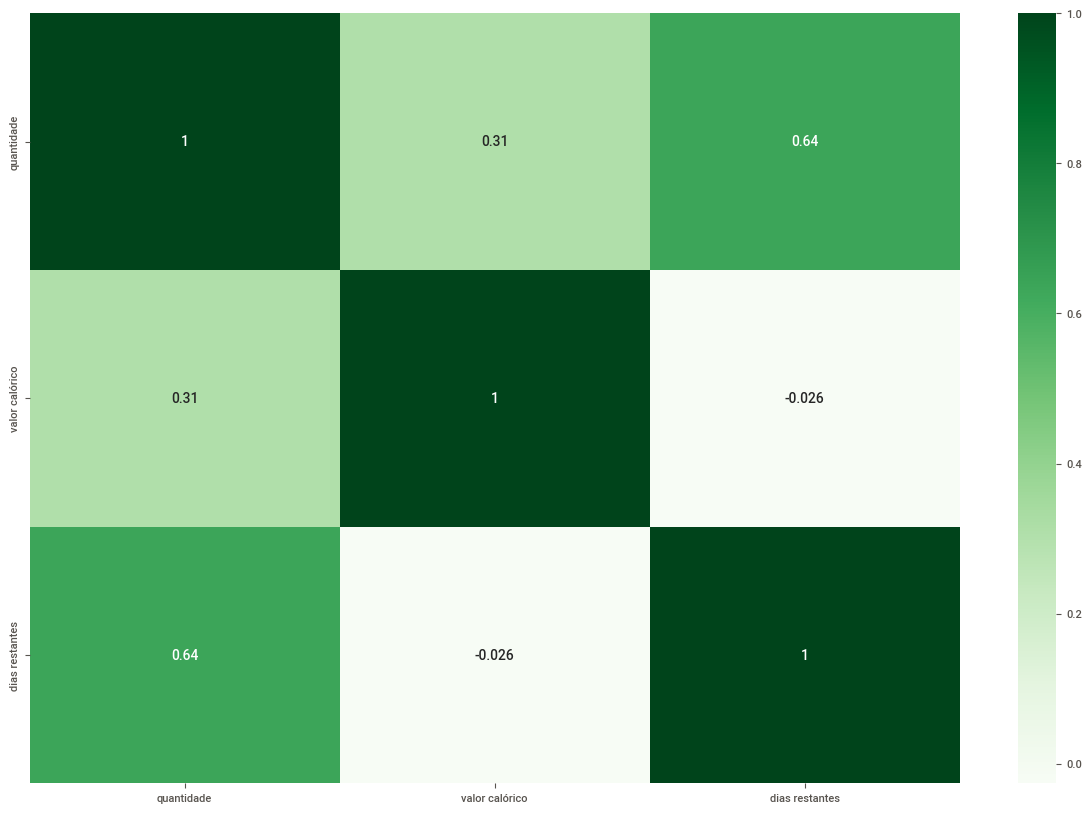

In [3]:
#Correlação
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [4]:
#Funções para a análise dos outliers
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def grafico_barra(df,index, coluna):  
    plt.figure(figsize=(15, 5))
    df = df.groupby(index).sum()[coluna].reset_index()
    ax = sns.barplot(x=df[index], y=df[coluna])

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


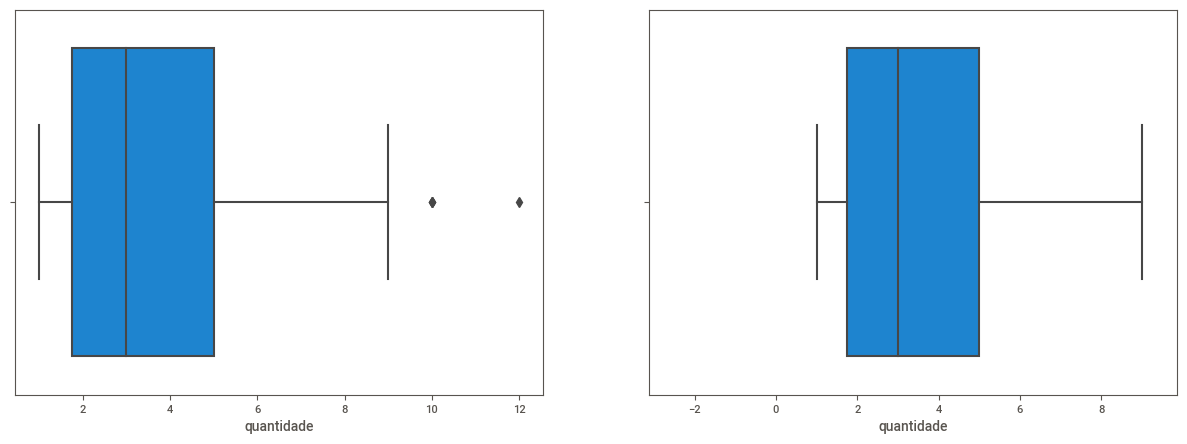

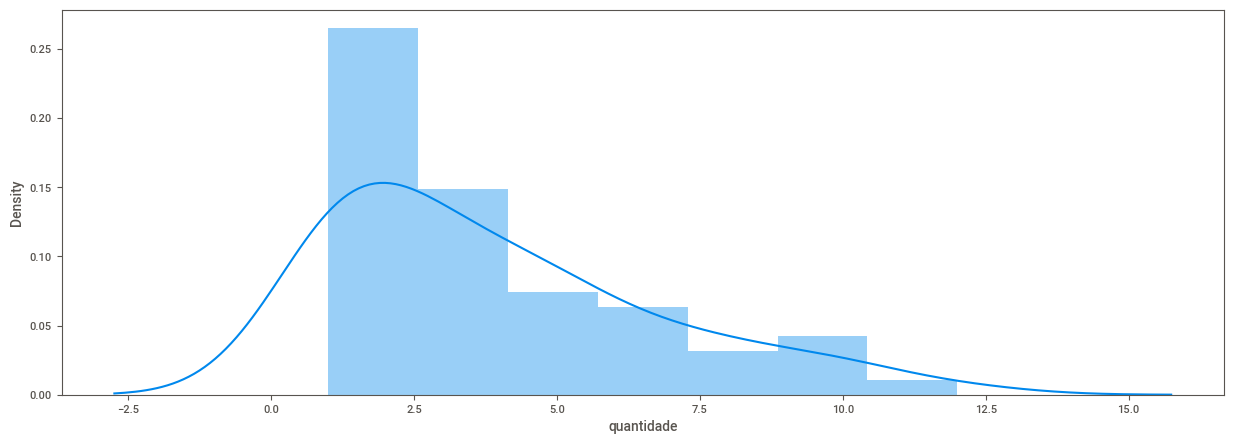

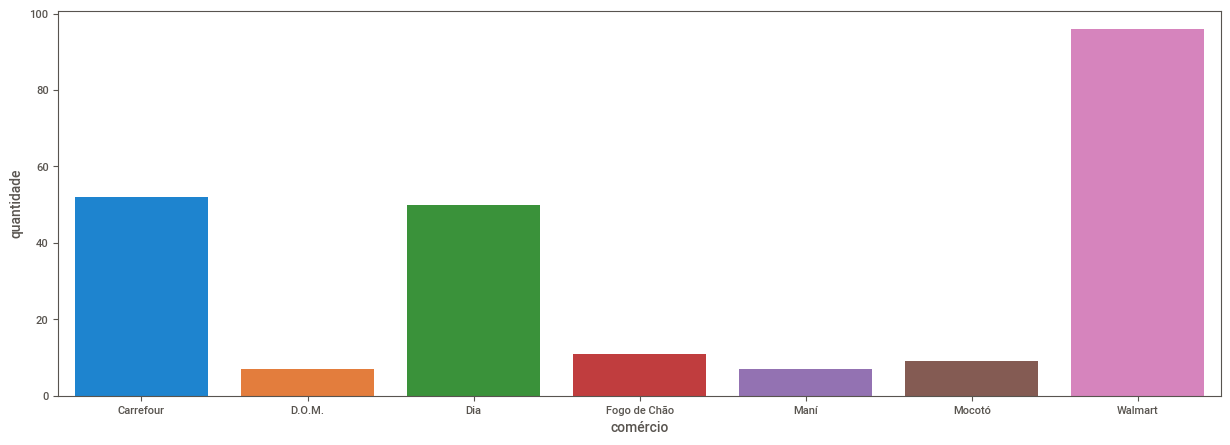

In [5]:
# quantidade
diagrama_caixa(df['quantidade'])
histograma(df['quantidade'])
grafico_barra(df,'comércio','quantidade')

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


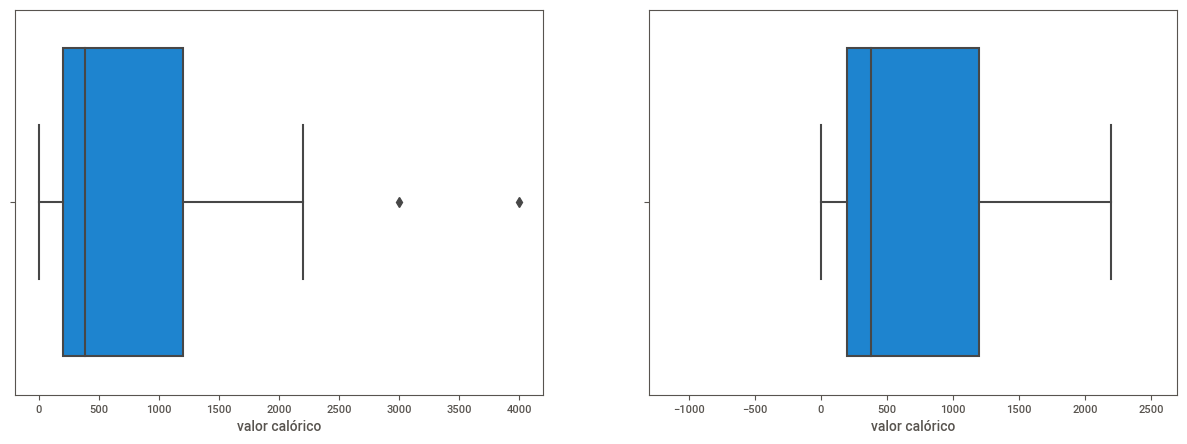

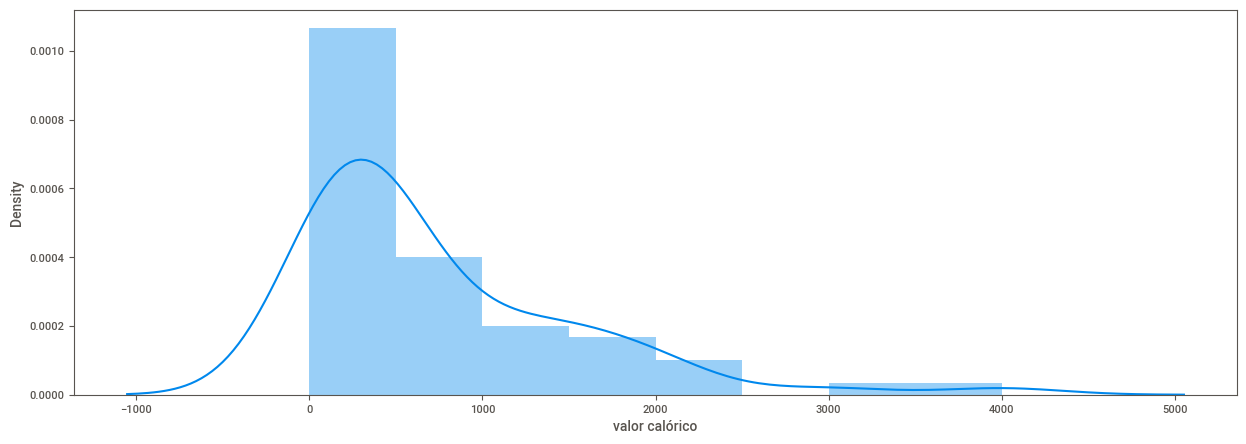

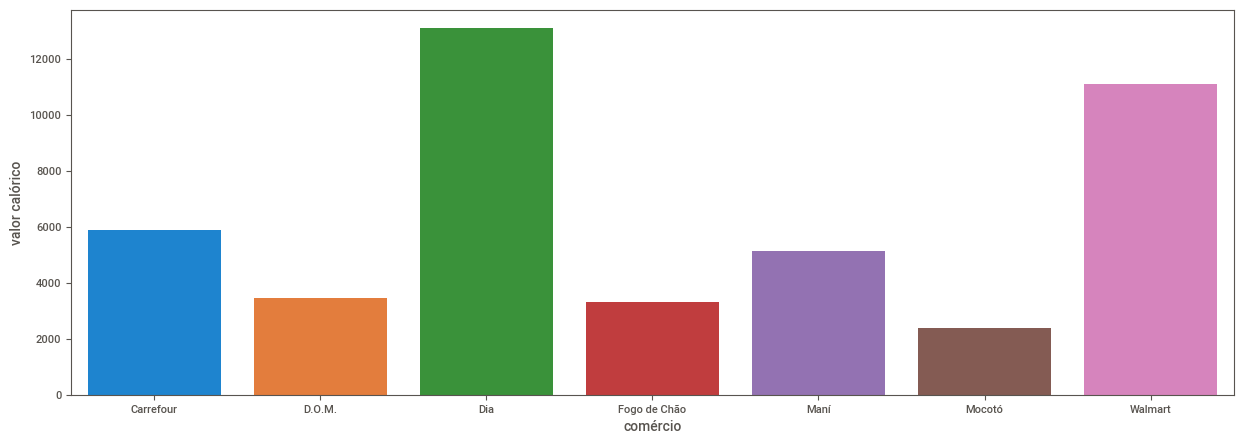

In [6]:
# valor calórico
diagrama_caixa(df['valor calórico'])
histograma(df['valor calórico'])
grafico_barra(df,'comércio','valor calórico')

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


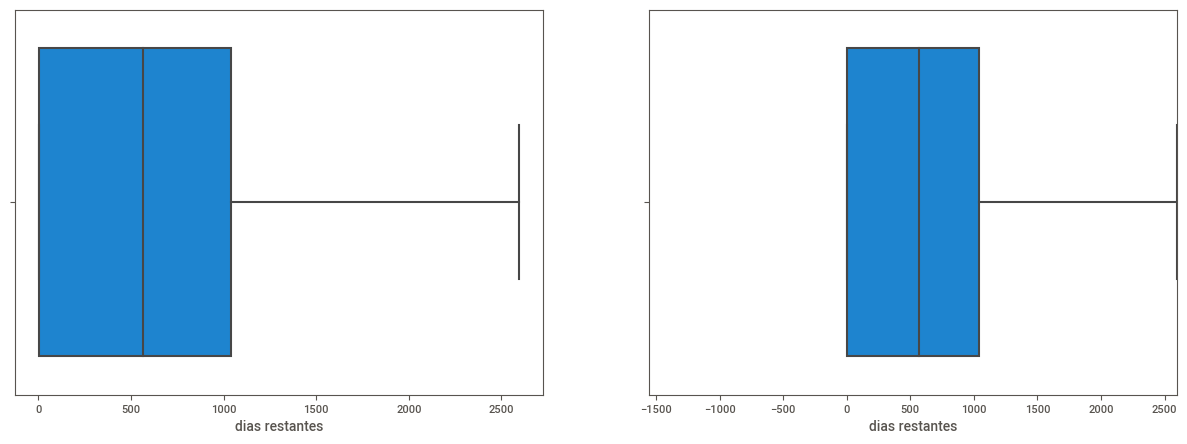

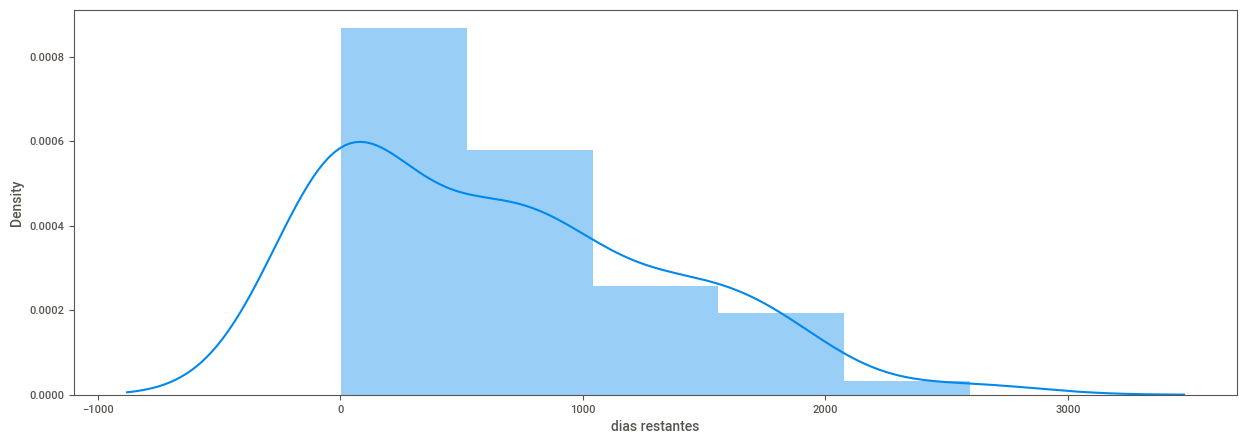

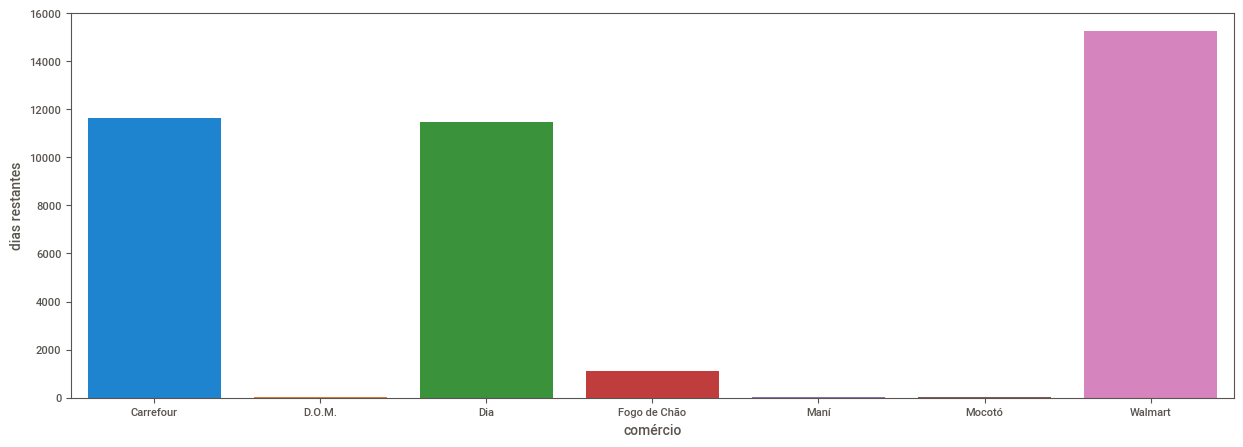

In [7]:
#Dias restantes
diagrama_caixa(df['dias restantes'])
histograma(df['dias restantes'])
grafico_barra(df,'comércio','dias restantes')

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


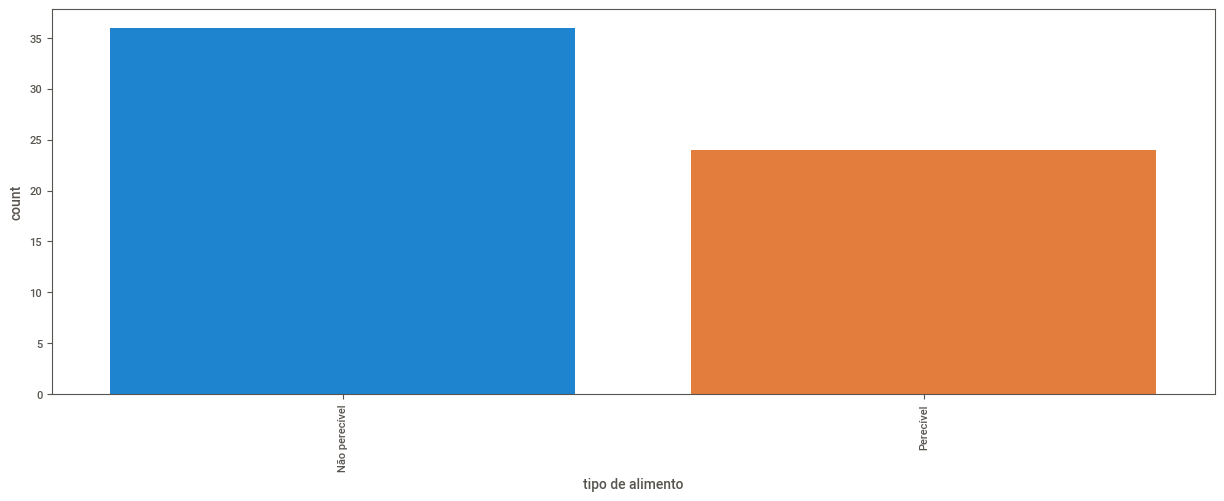

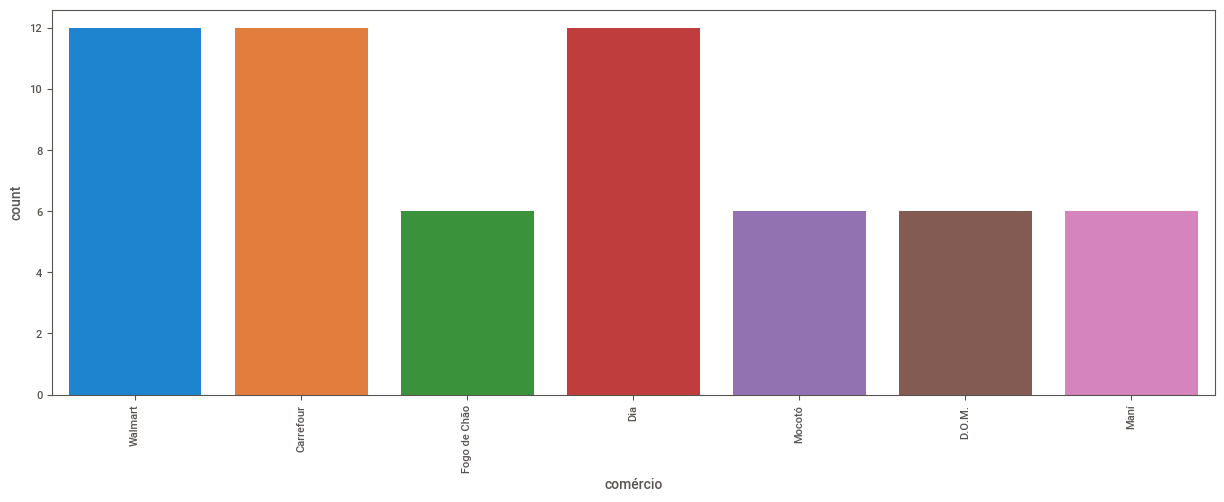

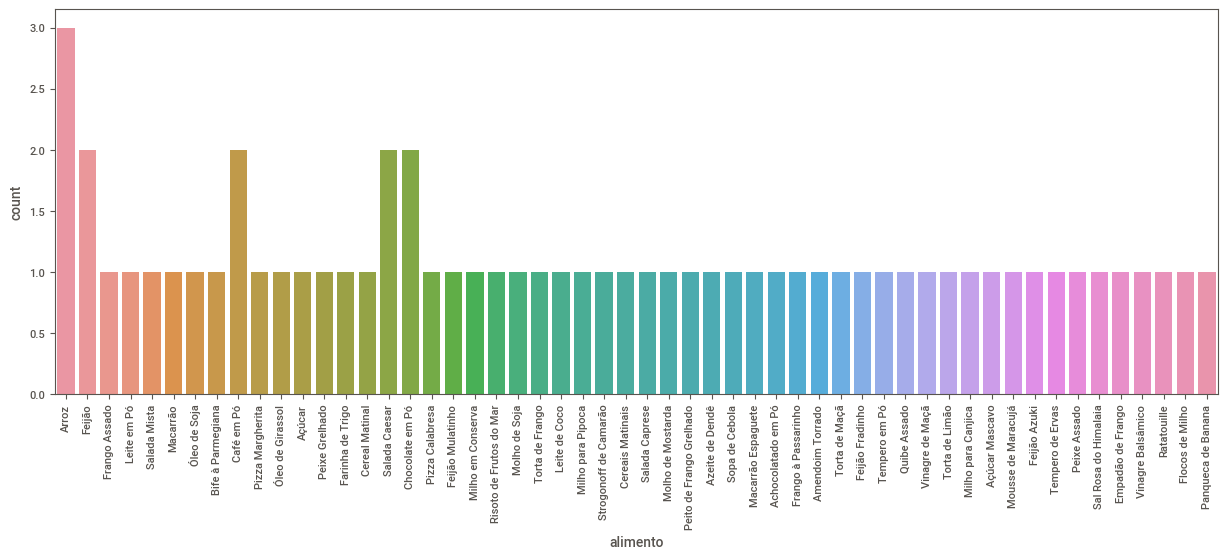

In [8]:
#Tipo de alimento
plt.figure(figsize=(15, 5))
grafico = sns.countplot('tipo de alimento', data=df)
grafico.tick_params(axis='x', rotation=90)

#Maiores fornecedores
plt.figure(figsize=(15, 5))
grafico = sns.countplot('comércio', data=df)
grafico.tick_params(axis='x', rotation=90)

#Maiores alimento
plt.figure(figsize=(15, 5))
grafico = sns.countplot('alimento', data=df)
grafico.tick_params(axis='x', rotation=90)

In [10]:
#Análise Exploratória de Dados

df_describe = df.describe().round(2)

display(df_describe)

,quantidade,valor calórico,dias restantes
count,60.00,60.00,60.00
mean,3.87,738.42,658.37
std,2.83,795.99,666.24
min,1.00,0.00,3.00
25%,1.75,199.00,3.00
50%,3.00,380.00,567.50
75%,5.00,1200.00,1041.75
max,12.00,4000.00,2596.00


Text(156.34722222222223, 0.5, 'Quantidade')

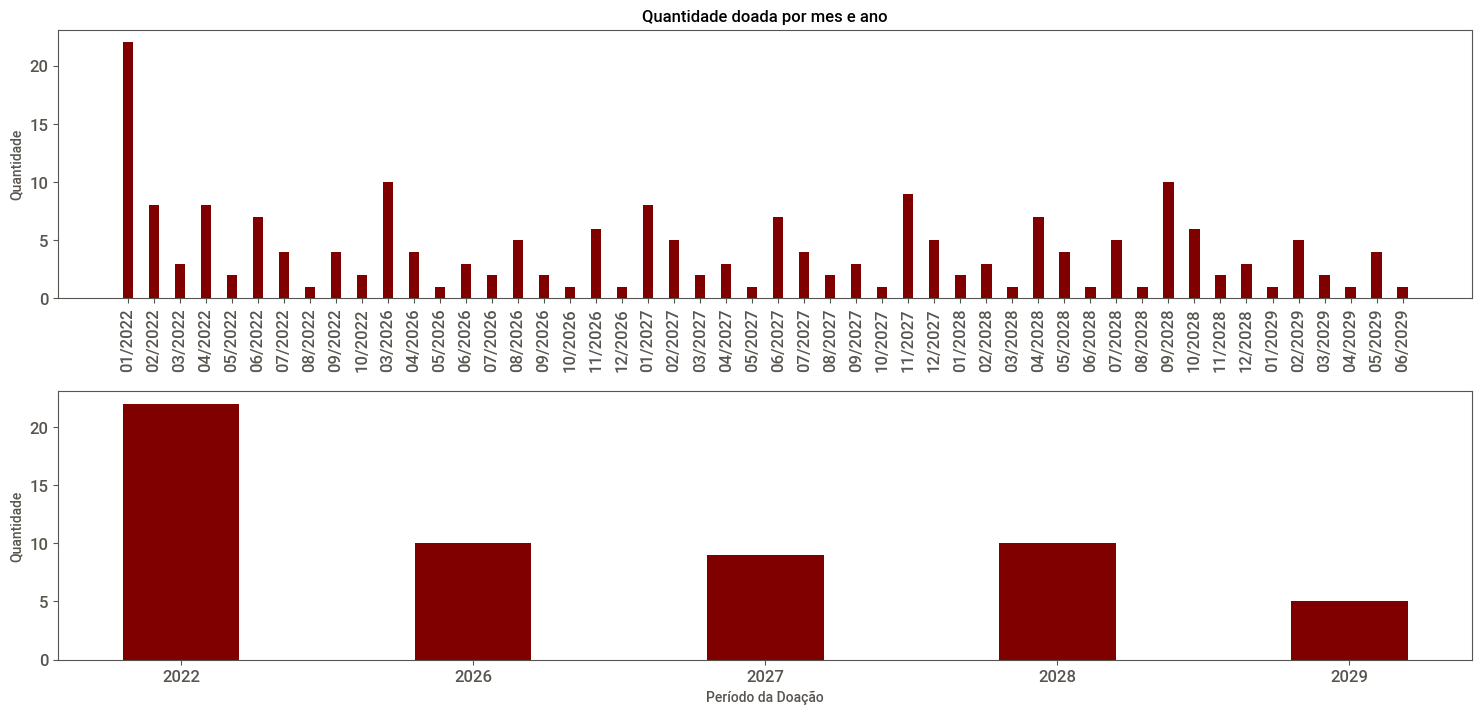

In [105]:
#Data da doação.

#Mes
df_datas = df.copy()
df_datas['data da doação'] = pd.to_datetime(df_datas['data da doação'])
df_datas = df_datas.sort_values("data da doação",ascending=True).reset_index(drop=True) 
df_datas = df_datas.groupby(["data da doação"]).sum()["quantidade"].to_frame().reset_index()
df_datas['data da doação']  = df_datas['data da doação'].apply(lambda x: x.strftime("%m/%Y"))

#ano
df_datas_y = df.copy()
df_datas_y['data da doação'] = pd.to_datetime(df_datas_y['data da doação'])
df_datas_y = df_datas_y.sort_values("data da doação",ascending=True).reset_index(drop=True) 
df_datas_y = df_datas_y.groupby(["data da doação"]).sum()["quantidade"].to_frame().reset_index()
df_datas_y['data da doação']  = df_datas_y['data da doação'].apply(lambda x: x.strftime("%Y"))

fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 7))
ax1.bar(df_datas['data da doação'], df_datas["quantidade"], color ='maroon',width = 0.4)
ax1.tick_params(axis="x", labelsize=12,labelrotation=90) 
ax1.tick_params(axis="y", labelsize=12) 
ax1.set_ylabel("Quantidade")
ax1.title.set_text("Quantidade doada por mês e ano")
fig.tight_layout()

ax2.bar(df_datas_y['data da doação'], df_datas_y["quantidade"], color ='maroon',width = 0.4)
ax2.set_xlabel("Período da Doação")
ax2.tick_params(axis="x", labelsize=12) 
ax2.tick_params(axis="y", labelsize=12) 
ax2.set_ylabel("Quantidade")


Text(156.34722222222223, 0.5, 'Quantidade')

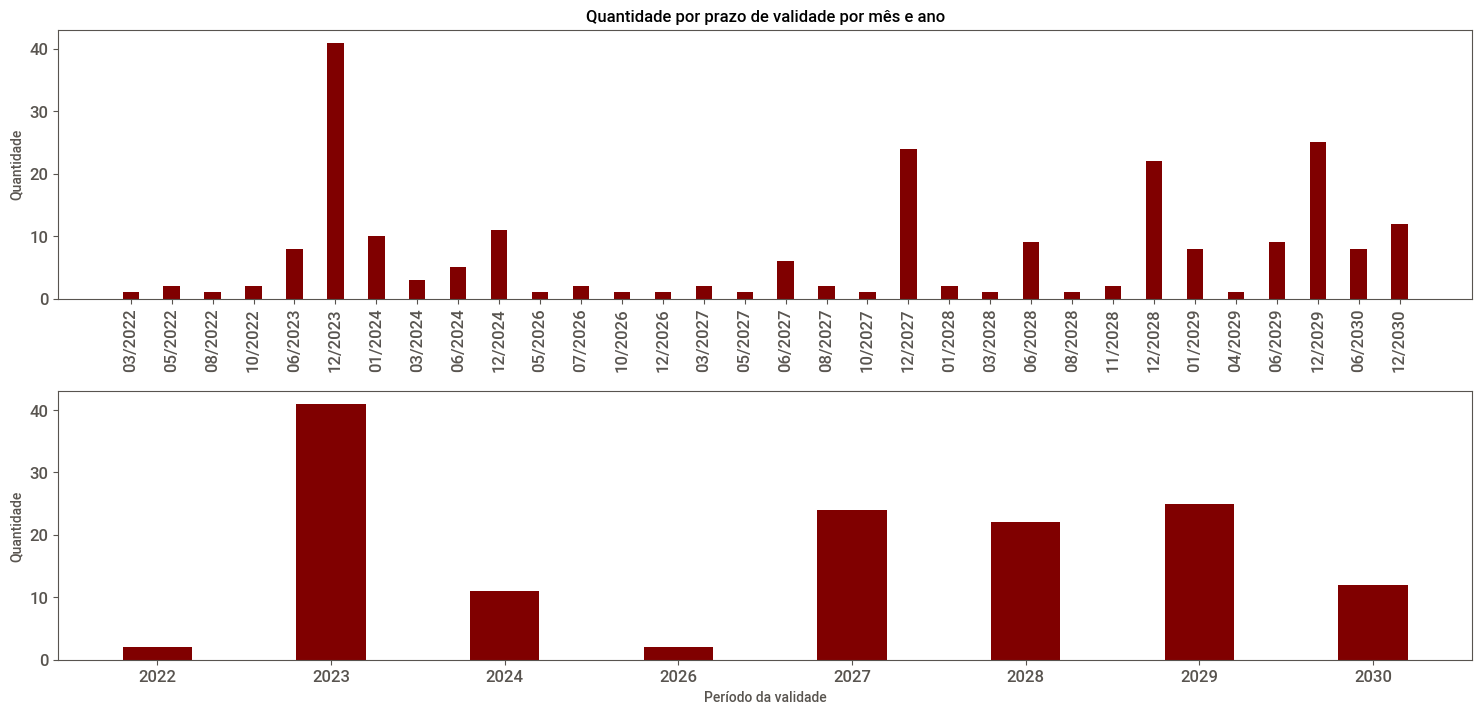

In [106]:
#Data da validade.

#Mes
df_datas = df.copy()
df_datas['data de validade'] = pd.to_datetime(df_datas['data de validade'])
df_datas = df_datas.sort_values("data de validade",ascending=True).reset_index(drop=True) 
df_datas = df_datas.groupby(["data de validade"]).sum()["quantidade"].to_frame().reset_index()
df_datas['data de validade']  = df_datas['data de validade'].apply(lambda x: x.strftime("%m/%Y"))

#ano
df_datas_y = df.copy()
df_datas_y['data de validade'] = pd.to_datetime(df_datas_y['data de validade'])
df_datas_y = df_datas_y.sort_values("data de validade",ascending=True).reset_index(drop=True) 
df_datas_y = df_datas_y.groupby(["data de validade"]).sum()["quantidade"].to_frame().reset_index()
df_datas_y['data de validade']  = df_datas_y['data de validade'].apply(lambda x: x.strftime("%Y"))

fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 7))
ax1.bar(df_datas['data de validade'], df_datas["quantidade"], color ='maroon',width = 0.4)
ax1.tick_params(axis="x", labelsize=12,labelrotation=90) 
ax1.tick_params(axis="y", labelsize=12) 
ax1.set_ylabel("Quantidade")
ax1.title.set_text("Quantidade por prazo de validade por mês e ano")
fig.tight_layout()

ax2.bar(df_datas_y['data de validade'], df_datas_y["quantidade"], color ='maroon',width = 0.4)
ax2.set_xlabel("Período da validade")
ax2.tick_params(axis="x", labelsize=12) 
ax2.tick_params(axis="y", labelsize=12) 
ax2.set_ylabel("Quantidade")